# Satellite Image Data Classification

### Import Packages and Dataset

In [84]:
#Load Packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.regularizers import l2
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics

In [85]:
#load Dataset
os.chdir('D:/data_for_JejuCamp/Data_toCNN/CSVfile') 
dataset = pd.read_csv('re_newClassInter_csvRe.csv')
list(dataset)

['OBJECTID',
 'X',
 'Y',
 'nB1',
 'nB2',
 'nB3',
 'nB4',
 'nB5',
 'nB7',
 'EVI',
 'NDVI',
 'NDWI',
 'SAVI',
 'Class',
 'Descriptio',
 'note']

In [86]:
#Define response Y and predictors X 
Class_ID = dataset[['Class']]
X = dataset[['nB1','nB2','nB3','nB4','nB5','nB7','EVI','NDVI','NDWI','SAVI']]
#Specify the target labels and flatten the array 
Y= np.ravel(Class_ID)
#Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
#Scale the train & test data set
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Create the Model

In [154]:
#Define model
input_units = 10
hidden1_units = 500
hidden2_units = 500
hidden3_units = 300
hidden4_units = 300
hidden5_units = 300
hidden6_units = 200
hidden7_units = 200
hidden8_units = 100
output_units = 5

model = Sequential([
    Dense(output_dim=hidden1_units, input_dim=input_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(output_dim=hidden2_units, input_dim=hidden1_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(output_dim=hidden3_units, input_dim=hidden2_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden4_units, input_dim=hidden3_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden5_units, input_dim=hidden4_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden6_units, input_dim=hidden5_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden7_units, input_dim=hidden6_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden8_units, input_dim=hidden7_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=output_units, input_dim=hidden8_units, activation='softmax'),
 ])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, kernel_regularizer=<keras.reg..., activation="relu", units=500)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, kernel_regularizer=<keras.reg..., activation="relu", units=500)`
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, kernel_regularizer=<keras.reg..., activation="relu", units=300)`
  import sys
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=300, kernel_regularizer=<keras.reg..., activation="relu", units=300)`
  if __name__ == '__main__':
C:\Users\Admin\Anac

In [155]:
#Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 500)               5500      
_________________________________________________________________
dropout_39 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_40 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_41 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 300)               90300     
__________

In [156]:
#Define optimizer: Stochastic gradient descent 
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [163]:
#Fit model
from datetime import datetime 
t0 = datetime.now()
history=model.fit(X_train, Y_train, epochs=400, batch_size=100, validation_split = 0.2, verbose=1)
print(datetime.now()-t0)

Train on 201 samples, validate on 51 samples
Epoch 1/400
201/201 [==============================] - 0s 288us/step - loss: 0.9479 - acc: 0.7363 - val_loss: 1.0397 - val_acc: 0.7843
Epoch 2/400
201/201 [==============================] - 0s 268us/step - loss: 0.9636 - acc: 0.7164 - val_loss: 0.9915 - val_acc: 0.6275
Epoch 3/400
201/201 [==============================] - 0s 248us/step - loss: 0.9232 - acc: 0.7214 - val_loss: 0.9424 - val_acc: 0.6078
Epoch 4/400
201/201 [==============================] - 0s 258us/step - loss: 0.9175 - acc: 0.7413 - val_loss: 0.9467 - val_acc: 0.6078
Epoch 5/400
201/201 [==============================] - 0s 238us/step - loss: 0.9111 - acc: 0.7363 - val_loss: 0.8838 - val_acc: 0.6078
Epoch 6/400
201/201 [==============================] - 0s 318us/step - loss: 0.8824 - acc: 0.7413 - val_loss: 0.8760 - val_acc: 0.6471
Epoch 7/400
201/201 [==============================] - 0s 288us/step - loss: 0.8443 - acc: 0.7811 - val_loss: 0.9135 - val_acc: 0.7843
Epoch 8/40

Epoch 61/400
201/201 [==============================] - 0s 278us/step - loss: 0.8039 - acc: 0.8159 - val_loss: 0.9074 - val_acc: 0.5686
Epoch 62/400
201/201 [==============================] - 0s 263us/step - loss: 0.9123 - acc: 0.6766 - val_loss: 1.0336 - val_acc: 0.7059
Epoch 63/400
201/201 [==============================] - 0s 263us/step - loss: 1.1299 - acc: 0.5970 - val_loss: 0.9181 - val_acc: 0.7451
Epoch 64/400
201/201 [==============================] - 0s 253us/step - loss: 0.9566 - acc: 0.7463 - val_loss: 1.0503 - val_acc: 0.5882
Epoch 65/400
201/201 [==============================] - 0s 253us/step - loss: 0.9815 - acc: 0.6866 - val_loss: 0.9711 - val_acc: 0.6275
Epoch 66/400
201/201 [==============================] - 0s 248us/step - loss: 0.9215 - acc: 0.7114 - val_loss: 0.8659 - val_acc: 0.7843
Epoch 67/400
201/201 [==============================] - 0s 248us/step - loss: 0.8416 - acc: 0.7214 - val_loss: 0.9545 - val_acc: 0.5882
Epoch 68/400
201/201 [==========================

201/201 [==============================] - 0s 233us/step - loss: 0.8289 - acc: 0.8060 - val_loss: 0.6620 - val_acc: 0.9020
Epoch 122/400
201/201 [==============================] - 0s 233us/step - loss: 0.7313 - acc: 0.8458 - val_loss: 0.8280 - val_acc: 0.8235
Epoch 123/400
201/201 [==============================] - 0s 238us/step - loss: 0.9031 - acc: 0.7662 - val_loss: 0.7037 - val_acc: 0.9020
Epoch 124/400
201/201 [==============================] - 0s 228us/step - loss: 0.7912 - acc: 0.8010 - val_loss: 0.7943 - val_acc: 0.8824
Epoch 125/400
201/201 [==============================] - 0s 218us/step - loss: 0.8487 - acc: 0.7612 - val_loss: 0.7208 - val_acc: 0.8824
Epoch 126/400
201/201 [==============================] - 0s 283us/step - loss: 0.8003 - acc: 0.7910 - val_loss: 0.6755 - val_acc: 0.8824
Epoch 127/400
201/201 [==============================] - 0s 253us/step - loss: 0.7760 - acc: 0.8060 - val_loss: 0.7154 - val_acc: 0.8627
Epoch 128/400
201/201 [==============================] 

Epoch 181/400
201/201 [==============================] - 0s 243us/step - loss: 0.7770 - acc: 0.7861 - val_loss: 0.8017 - val_acc: 0.8824
Epoch 182/400
201/201 [==============================] - 0s 248us/step - loss: 0.7283 - acc: 0.8060 - val_loss: 0.7168 - val_acc: 0.8431
Epoch 183/400
201/201 [==============================] - 0s 253us/step - loss: 0.6820 - acc: 0.8557 - val_loss: 0.7993 - val_acc: 0.8431
Epoch 184/400
201/201 [==============================] - 0s 258us/step - loss: 0.8971 - acc: 0.7512 - val_loss: 0.6827 - val_acc: 0.8627
Epoch 185/400
201/201 [==============================] - 0s 248us/step - loss: 0.7748 - acc: 0.8060 - val_loss: 0.6196 - val_acc: 0.9216
Epoch 186/400
201/201 [==============================] - 0s 253us/step - loss: 0.6981 - acc: 0.8408 - val_loss: 0.6144 - val_acc: 0.9020
Epoch 187/400
201/201 [==============================] - 0s 238us/step - loss: 0.7069 - acc: 0.8458 - val_loss: 0.7670 - val_acc: 0.8824
Epoch 188/400
201/201 [==================

Epoch 241/400
201/201 [==============================] - 0s 263us/step - loss: 0.8121 - acc: 0.7910 - val_loss: 1.7331 - val_acc: 0.6275
Epoch 242/400
201/201 [==============================] - 0s 288us/step - loss: 1.1611 - acc: 0.7562 - val_loss: 1.3041 - val_acc: 0.6275
Epoch 243/400
201/201 [==============================] - 0s 283us/step - loss: 0.9818 - acc: 0.7413 - val_loss: 1.3904 - val_acc: 0.5294
Epoch 244/400
201/201 [==============================] - 0s 273us/step - loss: 1.3905 - acc: 0.6468 - val_loss: 0.8152 - val_acc: 0.6471
Epoch 245/400
201/201 [==============================] - 0s 278us/step - loss: 0.8211 - acc: 0.7463 - val_loss: 0.7917 - val_acc: 0.8627
Epoch 246/400
201/201 [==============================] - 0s 263us/step - loss: 0.7736 - acc: 0.8060 - val_loss: 0.7093 - val_acc: 0.8627
Epoch 247/400
201/201 [==============================] - 0s 248us/step - loss: 0.7759 - acc: 0.8010 - val_loss: 0.6697 - val_acc: 0.8824
Epoch 248/400
201/201 [==================

Epoch 301/400
201/201 [==============================] - 0s 228us/step - loss: 0.6219 - acc: 0.8706 - val_loss: 0.6205 - val_acc: 0.8627
Epoch 302/400
201/201 [==============================] - 0s 223us/step - loss: 0.6352 - acc: 0.8408 - val_loss: 0.6292 - val_acc: 0.8431
Epoch 303/400
201/201 [==============================] - 0s 303us/step - loss: 0.6283 - acc: 0.8706 - val_loss: 0.6030 - val_acc: 0.8627
Epoch 304/400
201/201 [==============================] - 0s 263us/step - loss: 0.6437 - acc: 0.8607 - val_loss: 0.6721 - val_acc: 0.8824
Epoch 305/400
201/201 [==============================] - 0s 288us/step - loss: 0.6946 - acc: 0.8308 - val_loss: 0.6313 - val_acc: 0.8627
Epoch 306/400
201/201 [==============================] - 0s 283us/step - loss: 0.6438 - acc: 0.8806 - val_loss: 0.6675 - val_acc: 0.8627
Epoch 307/400
201/201 [==============================] - 0s 278us/step - loss: 0.6907 - acc: 0.8607 - val_loss: 0.6224 - val_acc: 0.8627
Epoch 308/400
201/201 [==================

### Model Evaluation

In [164]:
#List all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


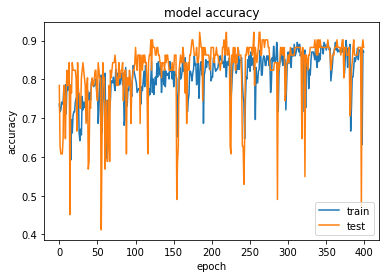

In [165]:
#Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

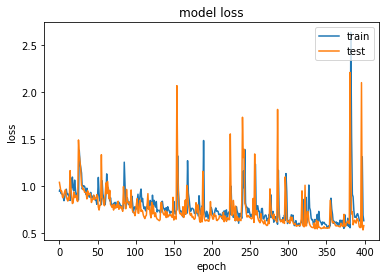

In [166]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [167]:
#Model evaluation with test data set 
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test,batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

63/63 [==============================] - 0s 127us/step
[0.5564961433410645, 0.8888888955116272]
Baseline Error: 11.11%


In [169]:
#Class prediction
test_class = model.predict_classes(X_test)

#Confusion matrix
print("Confussion matrix:\n%s" %
      metrics.confusion_matrix(Y_test, test_class))

Confussion matrix:
[[12  1  0  0  0]
 [ 1  8  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 10  0]
 [ 2  3  0  0 14]]


In [170]:
#Precision and accuracy:
print("Classification report:\n%s" %
      metrics.classification_report(Y_test, test_class))
print("Classification accuracy: %f" %
      metrics.accuracy_score(Y_test, test_class))

Classification report:
             precision    recall  f1-score   support

          0       0.80      0.92      0.86        13
          1       0.67      0.89      0.76         9
          2       1.00      1.00      1.00        12
          3       1.00      1.00      1.00        10
          4       1.00      0.74      0.85        19

avg / total       0.91      0.89      0.89        63

Classification accuracy: 0.888889


### Classify Satellite Image Data & Create Spatial Data

In [171]:
#Import grid point data
grid_point = pd.read_csv('reNew_merge_data.csv')
# Create grid data frame with ten bands
X_grid = grid_point[['nB1','nB2','nB3','nB4','nB5','nB7','EVI','NDVI','NDWI','SAVI']]
# Create xy-coordinated data frame
xy_grid=grid_point[['OBJECTID','X', 'Y']]

In [172]:
#Scale the grid set
X_grid = preprocessing.scale(X_grid)
#Prediction at grid locations
grid_class = pd.DataFrame(model.predict_classes(X_grid))
#Join x,y coordinates with predicted grid_class data frame
grid_class_xy = pd.concat([xy_grid, grid_class], axis=1, join_axes=[xy_grid.index])
#Rename predicted class column to Class_ID
grid_class_xy.columns.values[3] = 'Class_ID'

In [176]:
## Load landuse ID file
id = 'New_Landuse_ID.csv'
LU_ID = pd.read_csv(id)
print(LU_ID)

   Class_ID    Class Description
0         0  Class_1     Buildup
1         1  Class_2      Forest
2         2  Class_3       Water
3         3  Class_4    Mangrove
4         4  Class_5       Other


In [41]:
#Join Landuse class 
grid_class_final = pd.merge(grid_class_xy, LU_ID, left_on='Class_ID', right_on='Class_ID', how='left')
#Write CSV files 
grid_class_final.to_csv('predcted_landuse_class.csv', index=False)

In [178]:
#Create a spatial data frame
from osgeo import ogr, gdal
import geopandas as gpd
from shapely.geometry import Point
from pyproj import Proj, transform
from matplotlib.colors import LinearSegmentedColormap

#Define geometry
geometry = [Point(xy) for xy in zip(grid_class_final.X, grid_class_final.Y)]
#Define projection (WGS84)
crs = {'init': 'EPSG:4326'}
#Create Geodata frame
gdf = gpd.GeoDataFrame(grid_class_final, crs=crs, geometry = geometry)
#Save as ESRI shape file
gdf.to_file("predicted_landuse.shp")

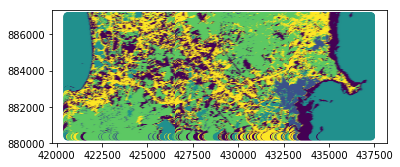

In [181]:
#Plot a spatial data
gdf.plot(column='Class_ID', cmap='viridis_r', categorical=True, legend=True)

In [180]:
model.save('model.h5')

* Adapted from: https://github.com/zia207/Deep-Neural-Network-with-keras-Python-Satellite-Image-Classification